# 0. Reading and sorting datasets

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import re 

def fullRead(pathToTable, sep, anthro = False):

  df_renamed = pd.read_csv(pathToTable, sep = sep, encoding = "latin_1")
  
  df_name = re.sub("_ord.csv","",(re.sub("data/", "" ,pathToTable)))
  # reading and merging    
  
  if anthro == True:
    df_anthro = pd.read_csv("data/chronicAnthropometricCardiovascularData.csv", sep=";", decimal=",")
    df_renamed = df_renamed.merge(df_anthro)

    # separating by time moment and renaming

    df_renamed["Weight"] = ""
    df_renamed["BMI"] = ""
    df_renamed["Fat"] = ""
    df_renamed["CVRI"] = ""
    df_renamed["Bpmin"] = ""
    df_renamed["Bpmax"] = ""
    df_renamed["Frec"] = ""

    for i in range(len(df_renamed)):

        if df_renamed.loc[i]["Time"] == "Initial":
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso inicial"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Inicial"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa inicial"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV inicial"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin inicial"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax inicial"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec inicial"] 
                
        if df_renamed.loc[i]["Time"] == "Final":
        
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso final"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Final"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa final"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV Final"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin final"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax final"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec final"] 
        
    df_renamed.drop(columns = ["Peso inicial", "Peso final", "Delta Peso", "Talla", "IMC Inicial", "IMC Final", "Delta IMC", "Grasa inicial", "Grasa final", "Delta Grasa", "IRCV Final", "IRCV inicial", "Bpmin final", "Bpmin inicial", "Bpmax final", "Bpmax inicial", "Frec final", "Frec inicial",], inplace=True )
  
  df_renamed.drop(columns = ["Unnamed: 0", "grouping"], inplace=True )
  df_renamed.fillna(0, inplace=True)
  return (df_renamed, df_name)

def scaling(df_read):
   
   scaler = preprocessing.MinMaxScaler()
   numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
   df_read[numCols] = scaler.fit_transform(df_read[numCols])
   return df_read

def encodingSplitting(df):
  df = pd.get_dummies(df, columns = ["Sweetener", "Sex", "Time"], drop_first=False)
  X_met, y_met = df[df["Time_Initial"] == 1].drop(["numVol", "Time_Initial", "Time_Final"], axis=1), df[df["Time_Final"] == 1].drop(['Sweetener_SA', 'Sweetener_ST','Sweetener_SU', 'Sex_MAN', 'Sex_WOMAN', 'Time_Final', 'Time_Initial','numVol', 'Weight','BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec'], axis = 1)
  X_metTrain, X_metTest, y_metTrain, y_metTest = train_test_split(X_met, y_met, test_size=0.2, random_state=42)

  X_full, y_full = df[df["Time_Initial"] == 1].drop(["numVol", "Time_Initial", "Time_Final"], axis=1), df[df["Time_Final"] == 1].drop(['numVol','Sweetener_SA', 'Sweetener_ST','Sweetener_SU','Time_Final', 'Time_Initial'], axis = 1)
  X_fullTrain, X_fullTest, y_fullTrain, y_fullTest = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

  return(X_met, y_met, X_metTrain, X_metTest, y_metTrain, y_metTest, X_full, y_full, X_fullTrain, X_fullTest, y_fullTrain, y_fullTest)

# Dataset reading

In [35]:
df1_anthro, df1_anthro_name = scaling(fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= True)[0]), fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= True)[1] + "_Full"
df1_metab, df1_metab_name = scaling(fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= False)[0]), fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= False)[1] + "_met"

C:\Users\dres2\AppData\Local\Temp\ipykernel_16080\543983859.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
C:\Users\dres2\AppData\Local\Temp\ipykernel_16080\543983859.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns


# 1. Structure investigation 

# Structure investigation for urineAnt_Full
## shape (rows, cols):  (250, 32)
## types of variables
float64    28
object      3
int64       1
dtype: int64
## Non-numerical features
       Sweetener     Time  Sex
count        250      250  250
unique         3        2    2
top           SU  Initial  MAN
freq          84      125  142
## Numerical values


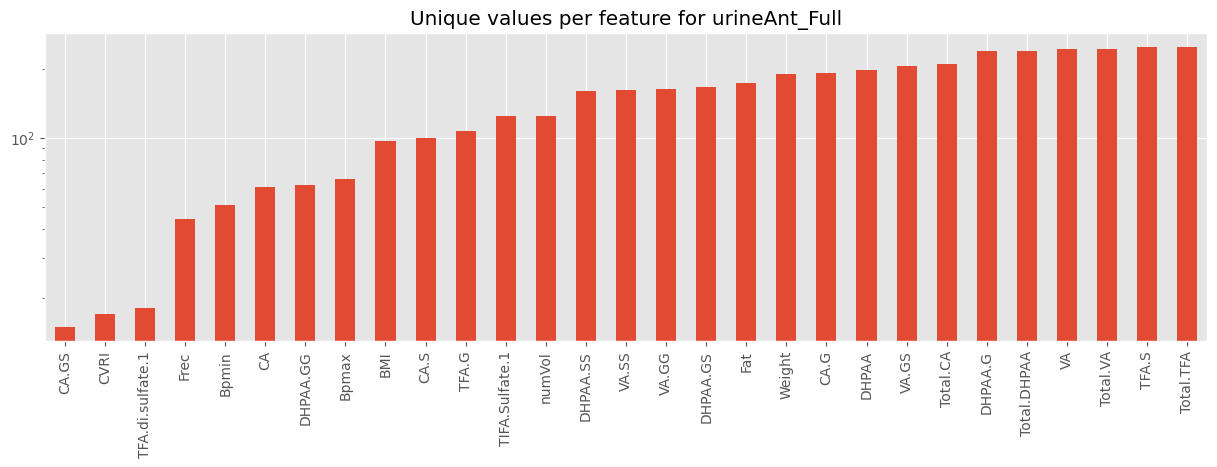

In [36]:
def strInv(df_scal, df_name):

    print("# Structure investigation for " + df_name)
    print("## shape (rows, cols): ",df_scal.shape)
    print("## types of variables")
    print(pd.value_counts(df_scal.dtypes))
    print("## Non-numerical features")
    print(df_scal.describe(exclude="number"))
    print ("## Numerical values")
    unique_values = df_scal.select_dtypes(include="number").nunique().sort_values()

    # Plot information with y-axis in log-scale
    unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature for " + df_name);

strInv(df1_anthro, df1_anthro_name)

# 2. Quality Investigation

No missing values because we have imputed to 0

## Duplicates
You seem to have 0 duplicates in urineAnt_Full
## Global view (numerical)


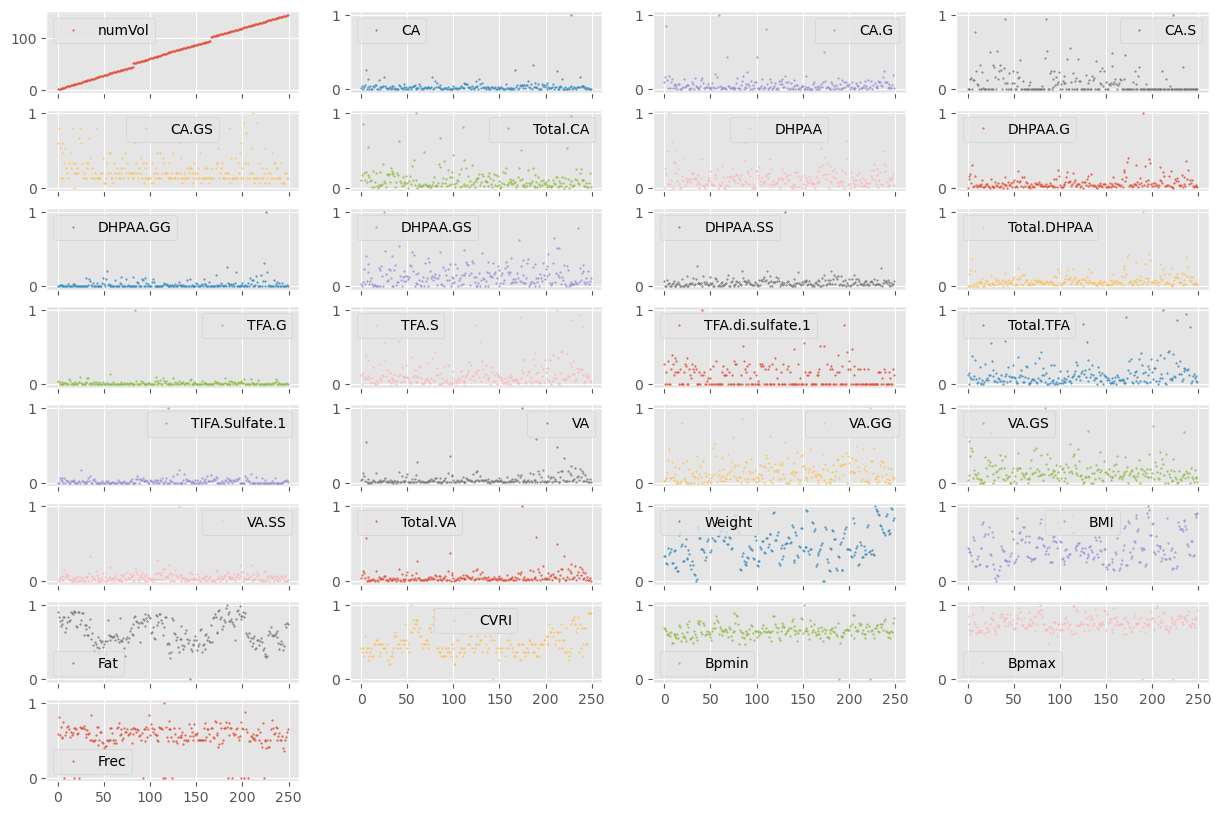

In [37]:
def qualInv (df_scal, df_name):
    print("## Duplicates")
    n_duplicates = df_scal.duplicated().sum()
    print(f"You seem to have {n_duplicates} duplicates in " + df_name)
    print("## Global view (numerical)")
    df_scal.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 10), markersize=1);
    

qualInv(df1_anthro, df1_anthro_name)

# 3. Content investigation 

## 3.1 Feature distribution

# histogram for numerical urineAnt_Full:


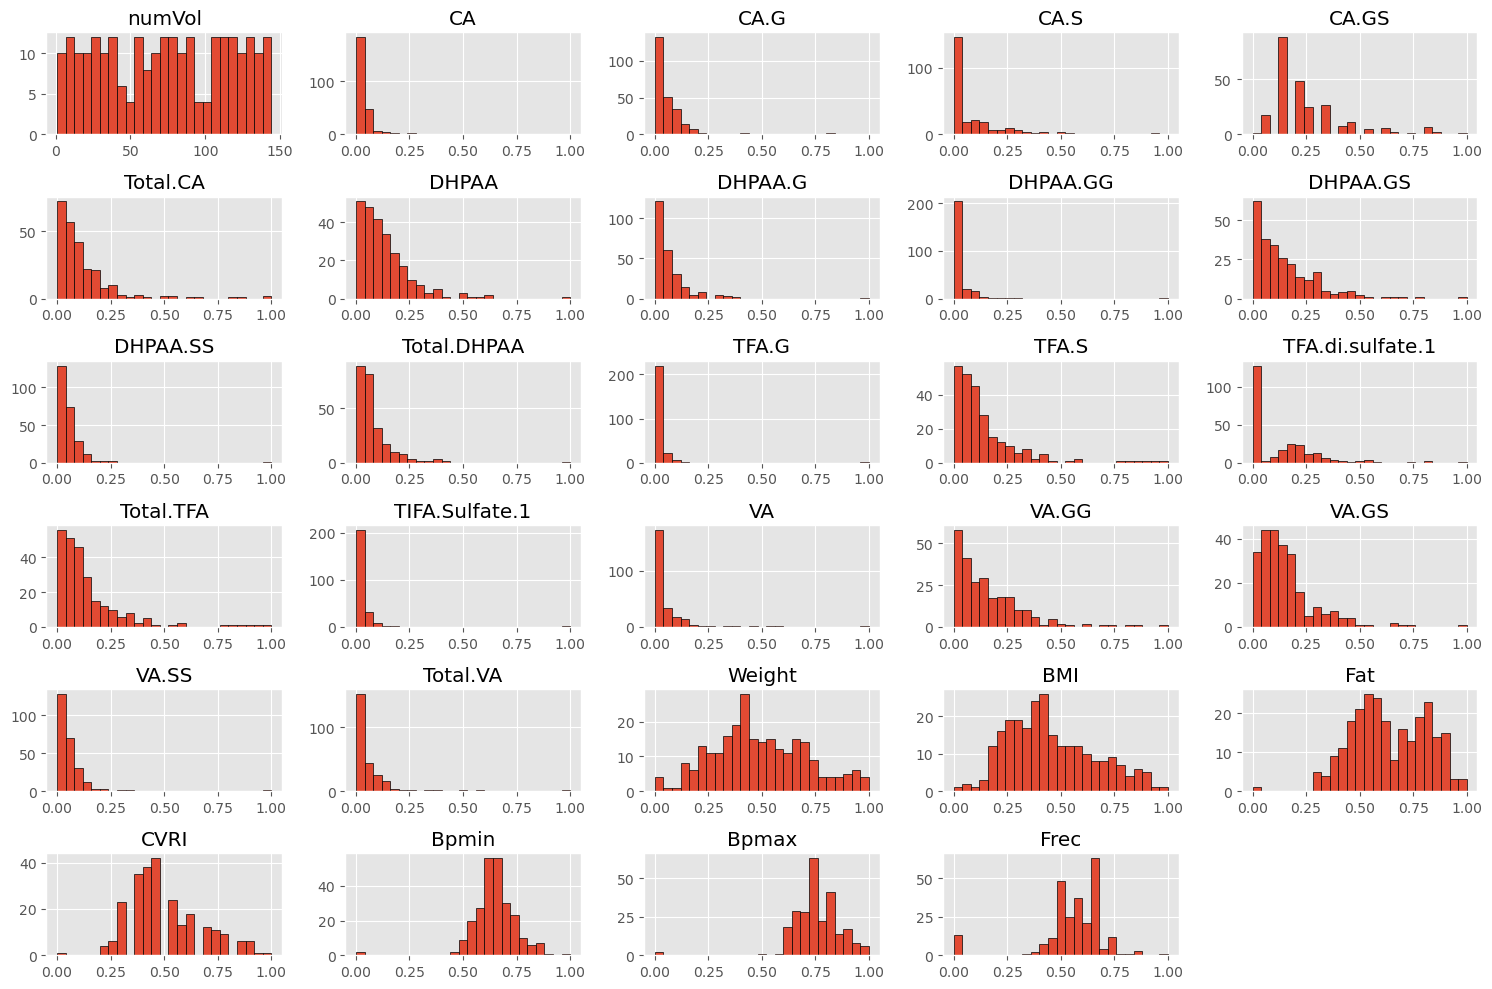

In [38]:
def contInv1 (df_scal, df_name):
    print("# histogram for numerical " + df_name + ":")
    df_scal.hist(bins=25, figsize=(15, 10), layout=(-1, 5), edgecolor="black")
    plt.tight_layout()

contInv1(df1_anthro, df1_anthro_name)


## Omitido por ahora, variables con una moda más frecuentemente repetida

In [ ]:
""" 
def contInv2 (df_scal, df_name):
    # Collects for each feature the most frequent entry
    most_frequent_entry = df_scal.mode()

    # Checks for each entry if it contains the most frequent entry
    df_freq = df_scal.eq(most_frequent_entry.values, axis=1)

    # Computes the mean of the 'is_most_frequent' occurrence
    df_freq = df_freq.mean().sort_values(ascending=False)

    # Show the 5 top features with the highest ratio of singular value content
    print("# frecuencies of singular values for " + df_name)
    print(df_freq.head())

    # Visualize the 'df_freq' table
    df_freq.plot.bar(figsize=(15, 4))

contInv2(df2_anthro, df2_anthro_name)
"""

## 3.2 Feature patterns

### 3.2.1 Continuous features

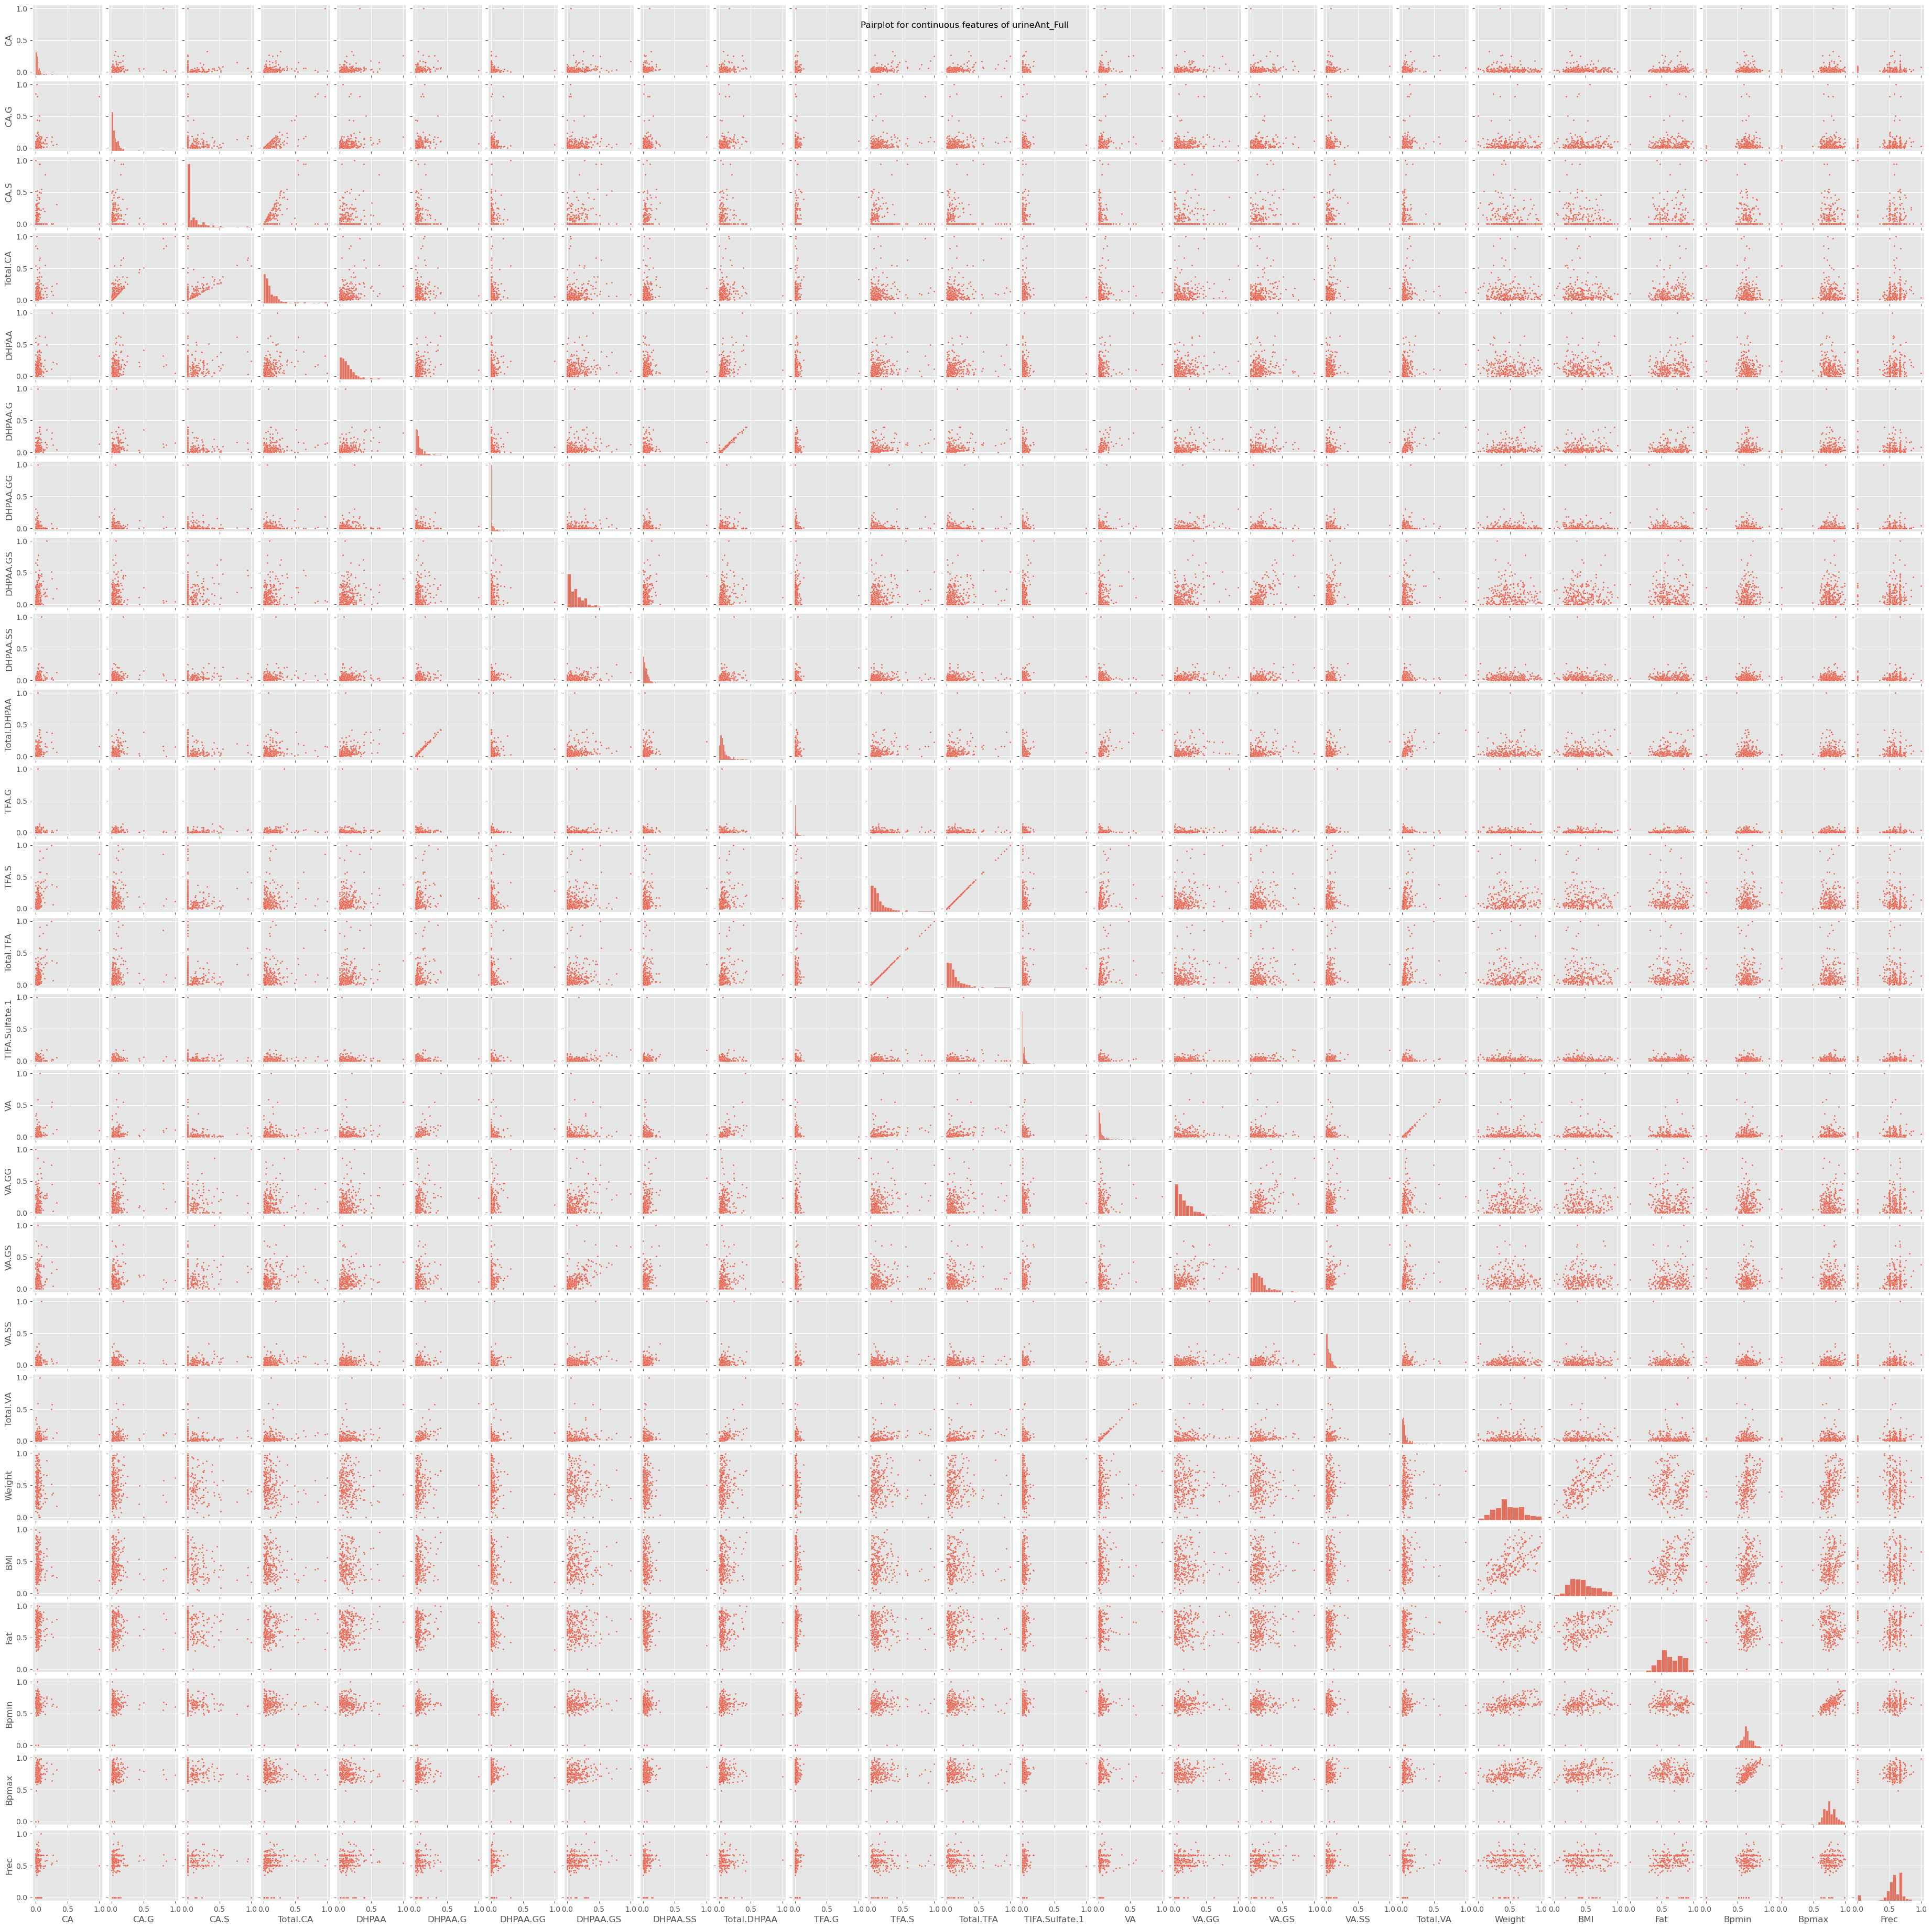

In [39]:
def contPatterns(df_scal, df_scal_name):
    cols_continuous = df_scal.select_dtypes(include="number").nunique() >= 25
    df_continuous = df_scal[cols_continuous[cols_continuous].index]

    sns.pairplot(df_continuous.loc[:, df_continuous.columns != "numVol"], height=1.5, plot_kws={"s": 5, "alpha": 0.8}, )
    plt.suptitle("Pairplot for continuous features of " + df_scal_name)    


contPatterns(df1_anthro, df1_anthro_name)

### 3.2.2 Discrete and ordinal features

C:\Users\dres2\AppData\Local\Temp\ipykernel_16080\903468783.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=5, alpha=1)
C:\Users\dres2\AppData\Local\Temp\ipykernel_16080\903468783.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=5, alpha=1)
C:\Users\dres2\AppData\Local\Temp\ipykernel_16080\903468783.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=5, alpha=1)


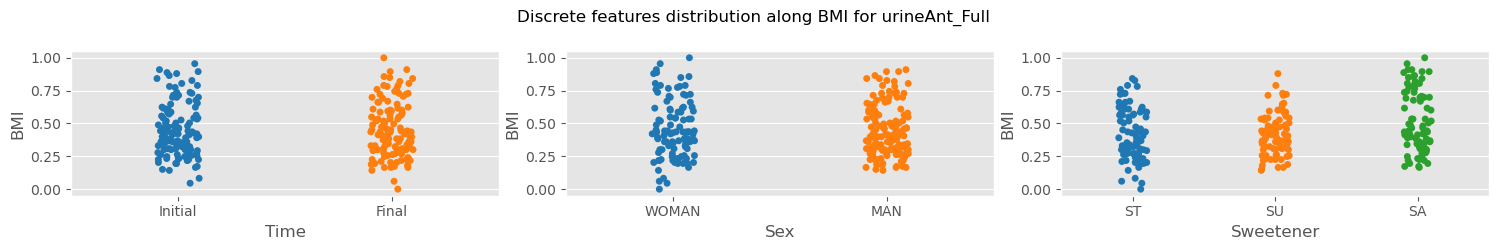

In [40]:
def discPatterns(df, df_name):
    cols_continuous = df.select_dtypes(include="number").nunique() >= 25
    df_discrete = df[["Time", "Sex", "Sweetener"]]
    
    n_cols = 3
    n_elements = len(df_discrete.columns)
    n_rows = np.ceil(n_elements / n_cols).astype("int")

    y_value = df["BMI"]

    fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))
    
    for col, ax in zip(df_discrete.columns, axes.ravel()):
        sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=5, alpha=1)
    plt.suptitle("Discrete features distribution along BMI for " + df_name)    
    plt.tight_layout();
    
    #df1_anthro.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
    #      figsize=(15, 30), markersize=1, title=df1_anthro_name)

discPatterns(df1_anthro, df1_anthro_name)

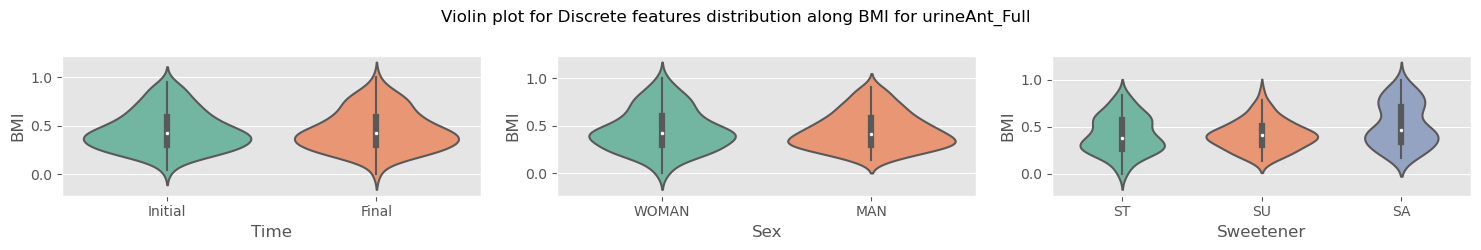

In [41]:
def discPatternsViolin(df, df_name):
    cols_continuous = df.select_dtypes(include="number").nunique() >= 25
    df_discrete = df[["Time", "Sex", "Sweetener"]]
    
    n_cols = 3
    n_elements = len(df_discrete.columns)
    n_rows = np.ceil(n_elements / n_cols).astype("int")

    y_value = df["BMI"]

    fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))
    
    
    # Loop through these features and plot entries from each feature against `Latitude`
    for col, ax in zip(df_discrete.columns, axes.ravel()):
        sns.violinplot(data=df, x=col, y=y_value, palette="Set2",
                    split=True, ax=ax)
    plt.suptitle("Violin plot for Discrete features distribution along BMI for " + df_name)    
    plt.tight_layout()

discPatternsViolin(df1_anthro, df1_anthro_name)


## 3.3 Feature relationships

C:\Users\dres2\AppData\Local\Temp\ipykernel_16080\2751434554.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df1_anthro.corr(method="pearson")


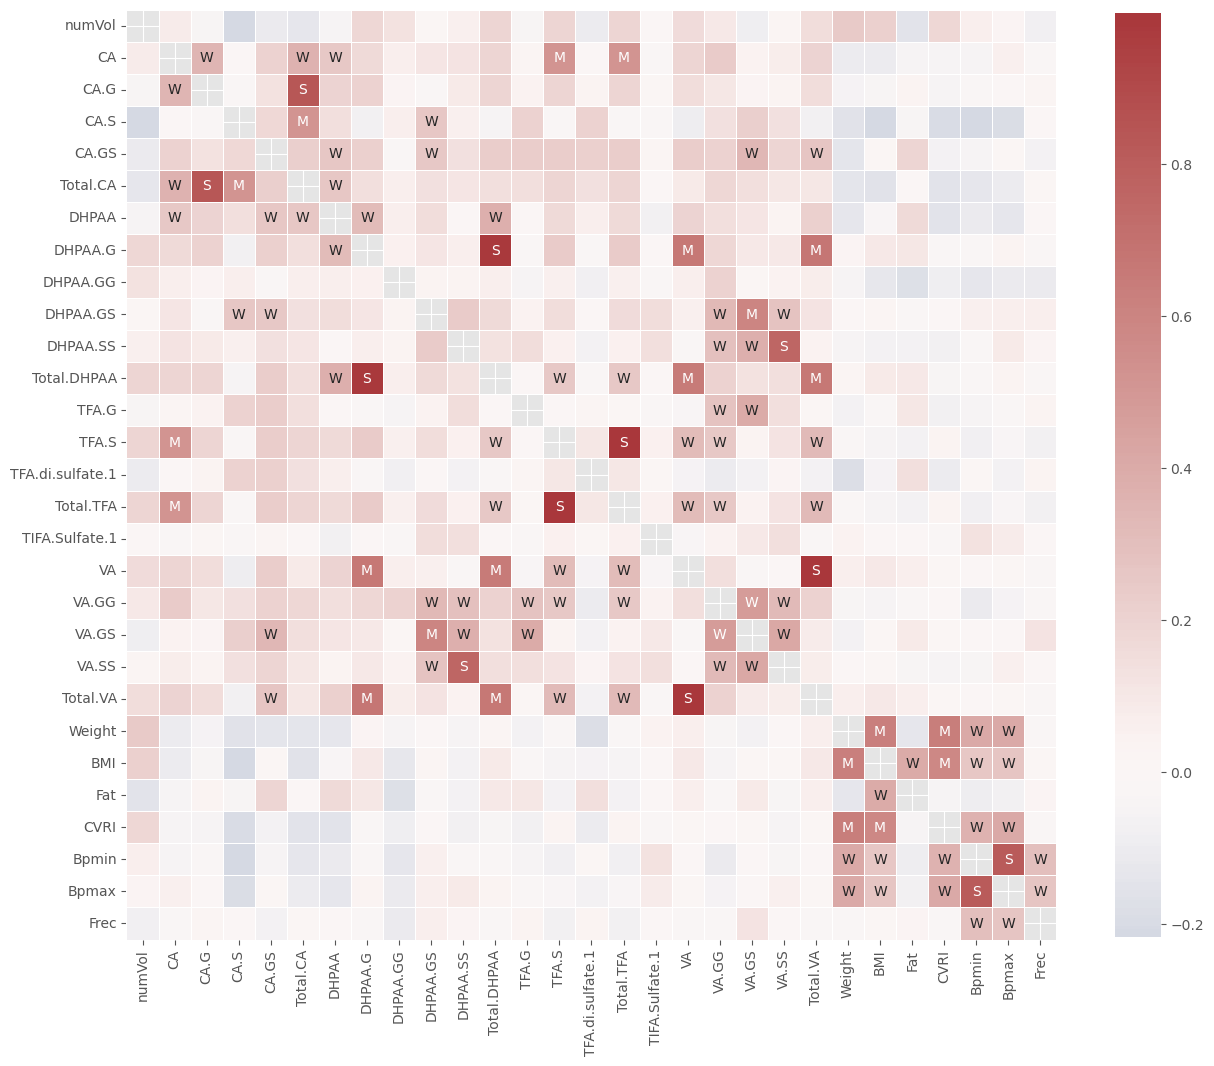

In [42]:
# Computes feature correlation
df_corr = df1_anthro.corr(method="pearson")

# CHECK IF Whereas the Pearson correlation evaluates the linear relationship between two continuous variables, the Spearman correlation evaluates the monotonic relationship based on the ranked values for each feature

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

Ordering correlations

In [43]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()
print ("feature correlations ordered from " + df1_anthro_name)
#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

df_corr_stacked.to_csv("correlationFeatures_"+df1_anthro_name+".csv")

feature correlations ordered from urineAnt_Full


Bpmin        CA.S      -0.216050
BMI          CA.S      -0.209916
CA.S         numVol    -0.206785
CVRI         CA.S      -0.196840
Bpmax        CA.S      -0.191286
                          ...   
             Bpmin      0.811272
Total.CA     CA.G       0.836383
Total.DHPAA  DHPAA.G    0.989885
Total.VA     VA         0.994362
Total.TFA    TFA.S      0.999917
Length: 406, dtype: float64